In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing needful libraries

import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


pd.pandas.set_option('display.max_columns', None)
# pd.pandas.set_option('display.max_rows', None)

In [3]:
# Loading the dataset
df = pd.read_csv('ipl_data.csv')

In [4]:
df.head()

,match_id,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,total_runs_in_over
0,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222,3
1,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222,3
2,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222,3
3,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222,3
4,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222,3


In [5]:
# checking for missing values
df.isnull().sum()

match_id              0
date                  0
venue                 0
batting_team          0
bowling_team          0
batsman               0
bowler                0
runs                  0
wickets               0
overs                 0
runs_last_5           0
wickets_last_5        0
striker               0
non-striker           0
total                 0
total_runs_in_over    0
dtype: int64

In [6]:
# removing unwanted columns
remove_columns = ['match_id','batsman','bowler','striker','non-striker','total_runs_in_over']
df.drop(labels = remove_columns,axis = 1, inplace = True)

In [7]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [8]:
# replacing new names of current teams
dict = {"Deccan Chargers" : 'Sunrisers Hyderabad', "Delhi Daredevils" : 'Delhi Capitals', "Gujarat Lions": 'Gujarat Titans', "Kings XI Punjab" : 'Punjab Kings'}
df=df.replace({"batting_team": dict})
df=df.replace({"bowling_team": dict})

In [9]:
# Considering team playing this year
playing_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Punjab Kings',
       'Royal Challengers Bangalore', 'Delhi Capitals','Sunrisers Hyderabad','Gujarat Titans']

In [10]:
# Keeping only the consistent teams
df = df[(df['batting_team'].isin(playing_teams)) & (df['bowling_team'].isin(playing_teams))]

In [11]:
print(df['batting_team'].unique())
print(df['bowling_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Punjab Kings'
 'Royal Challengers Bangalore' 'Delhi Capitals' 'Gujarat Titans']
['Royal Challengers Bangalore' 'Punjab Kings' 'Delhi Capitals'
 'Kolkata Knight Riders' 'Rajasthan Royals' 'Mumbai Indians'
 'Chennai Super Kings' 'Sunrisers Hyderabad' 'Gujarat Titans']


In [12]:
# removing first 6 overs as we will be able to predict the score only after some overs of game is played
df = df[df['overs']>=6.0]

In [13]:
df.head()

,date,venue,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
38,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,62,1,6.1,55,1,222
39,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,63,1,6.2,52,1,222
40,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,64,1,6.3,47,1,222
41,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,66,1,6.4,45,1,222
42,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,67,1,6.5,46,1,222


In [14]:
# changing format of date from string to date time
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [15]:
df['venue'].value_counts().head(20).index

Index(['Eden Gardens', 'M Chinnaswamy Stadium', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Rajiv Gandhi International Stadium, Uppal',
       'Punjab Cricket Association Stadium, Mohali', 'Sawai Mansingh Stadium',
       'Kingsmead', 'Sardar Patel Stadium, Motera', 'SuperSport Park',
       'Brabourne Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Dr DY Patil Sports Academy',
       'Himachal Pradesh Cricket Association Stadium', 'New Wanderers Stadium',
       'Saurashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Dubai International Cricket Stadium', 'St George's Park'],
      dtype='object')

### Data Preprocessing

In [16]:
# Encoding the batting_team and bowling_test
new_df = pd.get_dummies(data=df, columns=['batting_team', 'bowling_team'])

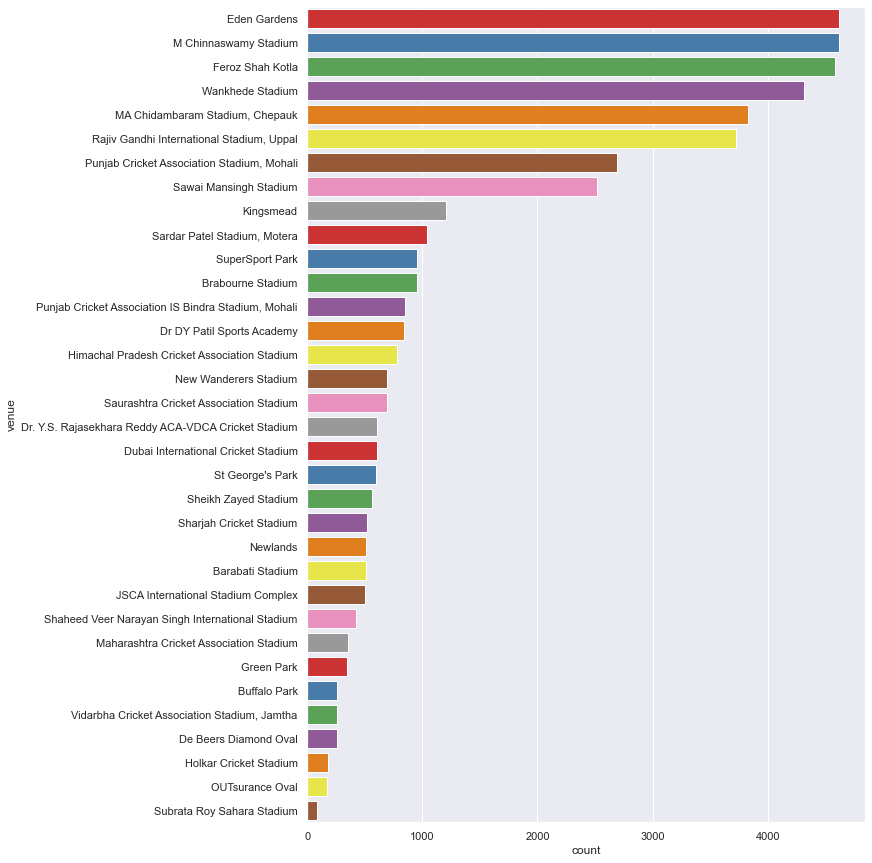

In [17]:
# checking for the importance of categories
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 15))
ax = sns.countplot(y="venue", data=new_df, orient="h",palette = "Set1",order = df.venue.value_counts().sort_values(ascending = False).index)
plt.show()

In [18]:
# creating function to impute dummy varibles
def one_hot_x(df,variable,top_labels):
    for label in top_labels:
        df[variable+'_'+label] = np.where(df[variable] == label,1,0)

In [19]:
# There are 33 stadiums but we will use 20 stadiums only due to curse of dimentionality
Stadiums_encoding = [i for i in df.venue.value_counts().sort_values(ascending = False).head(20).index]

one_hot_x(new_df,'venue',Stadiums_encoding)

In [20]:
new_df.drop(labels = ['venue'],axis = 1, inplace = True)

In [21]:
# new_df.columns

In [22]:
new_df = new_df[['date','total','batting_team_Chennai Super Kings',
       'batting_team_Delhi Capitals', 'batting_team_Gujarat Titans',
       'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians',
       'batting_team_Punjab Kings', 'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Chennai Super Kings',
       'bowling_team_Delhi Capitals', 'bowling_team_Gujarat Titans',
       'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians',
       'bowling_team_Punjab Kings', 'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad', 'venue_Eden Gardens',
       'venue_M Chinnaswamy Stadium', 'venue_Feroz Shah Kotla',
       'venue_Wankhede Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Sawai Mansingh Stadium', 'venue_Kingsmead',
       'venue_Sardar Patel Stadium, Motera', 'venue_SuperSport Park',
       'venue_Brabourne Stadium',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Dr DY Patil Sports Academy',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_New Wanderers Stadium',
       'venue_Saurashtra Cricket Association Stadium',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'venue_Dubai International Cricket Stadium', "venue_St George's Park",'overs','runs','wickets','runs_last_5','wickets_last_5']]

In [23]:
new_df

,date,total,batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Gujarat Titans,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Punjab Kings,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Capitals,bowling_team_Gujarat Titans,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Punjab Kings,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,venue_Eden Gardens,venue_M Chinnaswamy Stadium,venue_Feroz Shah Kotla,venue_Wankhede Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Rajiv Gandhi International Stadium, Uppal","venue_Punjab Cricket Association Stadium, Mohali",venue_Sawai Mansingh Stadium,venue_Kingsmead,"venue_Sardar Patel Stadium, Motera",venue_SuperSport Park,venue_Brabourne Stadium,"venue_Punjab Cricket Association IS Bindra Stadium, Mohali",venue_Dr DY Patil Sports Academy,venue_Himachal Pradesh Cricket Association Stadium,venue_New Wanderers Stadium,venue_Saurashtra Cricket Association Stadium,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Dubai International Cricket Stadium,venue_St George's Park,overs,runs,wickets,runs_last_5,wickets_last_5
38,2008-04-18,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.1,62,1,55,1
39,2008-04-18,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.2,63,1,52,1
40,2008-04-18,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.3,64,1,47,1
41,2008-04-18,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.4,66,1,45,1
42,2008-04-18,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.5,67,1,46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,107,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.1,106,9,29,4
75885,2017-05-19,107,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.2,107,9,29,4
75886,2017-05-19,107,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.3,107,9,28,4
75887,2017-05-19,107,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.4,107,9,24,4


#### Model Creation

In [24]:
# Splitting the data into train and test set
X_train = new_df.drop(labels='total', axis=1)[new_df['date'].dt.year <= 2015]
X_test = new_df.drop(labels='total', axis=1)[new_df['date'].dt.year >= 2016]

In [25]:
y_train = new_df[new_df['date'].dt.year <= 2015]['total'].values
y_test = new_df[new_df['date'].dt.year >= 2016]['total'].values

In [26]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [28]:
X_train

,batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Gujarat Titans,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Punjab Kings,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Capitals,bowling_team_Gujarat Titans,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Punjab Kings,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,venue_Eden Gardens,venue_M Chinnaswamy Stadium,venue_Feroz Shah Kotla,venue_Wankhede Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Rajiv Gandhi International Stadium, Uppal","venue_Punjab Cricket Association Stadium, Mohali",venue_Sawai Mansingh Stadium,venue_Kingsmead,"venue_Sardar Patel Stadium, Motera",venue_SuperSport Park,venue_Brabourne Stadium,"venue_Punjab Cricket Association IS Bindra Stadium, Mohali",venue_Dr DY Patil Sports Academy,venue_Himachal Pradesh Cricket Association Stadium,venue_New Wanderers Stadium,venue_Saurashtra Cricket Association Stadium,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Dubai International Cricket Stadium,venue_St George's Park,overs,runs,wickets,runs_last_5,wickets_last_5
38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.1,62,1,55,1
39,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.2,63,1,52,1
40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.3,64,1,47,1
41,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.4,66,1,45,1
42,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.5,67,1,46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61935,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.2,191,5,57,2
61936,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.3,192,5,56,2
61937,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.4,198,5,56,2
61938,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.5,202,5,58,2


## Linear Regression

In [29]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)  


In [30]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(r2_score(y_test,y_pred))

MAE: 12.34948716815757
MSE: 268.08609190622303
RMSE: 16.3733347826954
0.6908314065551147


<function matplotlib.pyplot.show(close=None, block=None)>

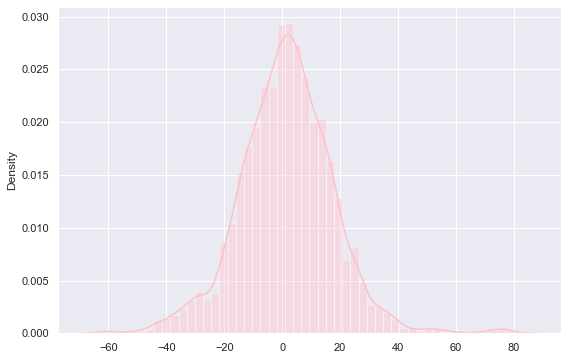

In [31]:
f, ax = plt.subplots(figsize=(9, 6))
ax = sns.distplot(y_test-y_pred,color="pink")
plt.show

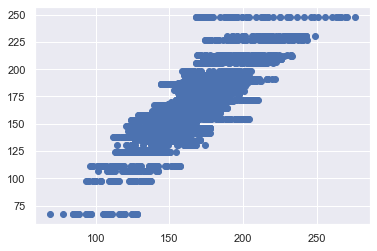

In [32]:
plt.scatter(y_pred, y_test)

## Ridge Regression

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
# parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,15,20,25,30,35,40,45]}
# ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)
# ridge_regressor.fit(X_train,y_train)

In [34]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV


alpha = [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,15,20,25,30,35,40,45]
max_iter = [int(x) for x in np.linspace(10, 1000,10)]
tol=[0.001,0.0001,0.00001]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

# Create the random grid
random_grid = {'alpha': alpha,
               'max_iter': max_iter,
               'tol': tol,
               'solver': solver
              }
print(random_grid)

{'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45], 'max_iter': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'tol': [0.001, 0.0001, 1e-05], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}


In [35]:
ridge_randomcv=RandomizedSearchCV(estimator=ridge,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100)
### fit the randomized model
ridge_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] tol=1e-05, solver=sparse_cg, max_iter=340, alpha=45 .............
[CV]  tol=1e-05, solver=sparse_cg, max_iter=340, alpha=45, total=   0.1s
[CV] tol=1e-05, solver=sparse_cg, max_iter=340, alpha=45 .............
[CV]  tol=1e-05, solver=sparse_cg, max_iter=340, alpha=45, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] tol=1e-05, solver=sparse_cg, max_iter=340, alpha=45 .............
[CV]  tol=1e-05, solver=sparse_cg, max_iter=340, alpha=45, total=   0.1s
[CV] tol=0.0001, solver=sag, max_iter=1000, alpha=30 .................
[CV] .. tol=0.0001, solver=sag, max_iter=1000, alpha=30, total=  10.7s
[CV] tol=0.0001, solver=sag, max_iter=1000, alpha=30 .................
[CV] .. tol=0.0001, solver=sag, max_iter=1000, alpha=30, total=  26.4s
[CV] tol=0.0001, solver=sag, max_iter=1000, alpha=30 .................
[CV] .. tol=0.0001, solver=sag, max_iter=1000, alpha=30, total=  20.6s
[CV] tol=1e-05, solver=saga, max_iter=890, alpha=1 ...................
[CV] .... tol=1e-05, solver=saga, max_iter=890, alpha=1, total=  28.7s
[CV] tol=1e-05, solver=saga, max_iter=890, alpha=1 ...................
[CV] .... tol=1e-05, solver=saga, max_iter=890, alpha=1, total=  26.9s
[CV] tol=1e-05, solver=saga, max_iter=890, alpha=1 ...................
[CV] .... tol=1e-05, solver=saga, max_iter=890, alpha=1, total=  29.4s
[CV

[CV] . tol=1e-05, solver=sag, max_iter=780, alpha=1e-08, total=  23.3s
[CV] tol=1e-05, solver=sag, max_iter=780, alpha=1e-08 ................
[CV] . tol=1e-05, solver=sag, max_iter=780, alpha=1e-08, total=  21.9s
[CV] tol=1e-05, solver=sag, max_iter=780, alpha=1e-08 ................
[CV] . tol=1e-05, solver=sag, max_iter=780, alpha=1e-08, total=  22.5s
[CV] tol=0.001, solver=cholesky, max_iter=230, alpha=5 ...............
[CV]  tol=0.001, solver=cholesky, max_iter=230, alpha=5, total=   0.0s
[CV] tol=0.001, solver=cholesky, max_iter=230, alpha=5 ...............
[CV]  tol=0.001, solver=cholesky, max_iter=230, alpha=5, total=   0.1s
[CV] tol=0.001, solver=cholesky, max_iter=230, alpha=5 ...............
[CV]  tol=0.001, solver=cholesky, max_iter=230, alpha=5, total=   0.0s
[CV] tol=0.001, solver=auto, max_iter=230, alpha=10 ..................
[CV] ... tol=0.001, solver=auto, max_iter=230, alpha=10, total=   0.0s
[CV] tol=0.001, solver=auto, max_iter=230, alpha=10 ..................
[CV] .

[CV]  tol=0.0001, solver=lsqr, max_iter=230, alpha=1e-08, total=   0.1s
[CV] tol=0.0001, solver=lsqr, max_iter=120, alpha=1e-15 ..............
[CV]  tol=0.0001, solver=lsqr, max_iter=120, alpha=1e-15, total=   0.1s
[CV] tol=0.0001, solver=lsqr, max_iter=120, alpha=1e-15 ..............
[CV]  tol=0.0001, solver=lsqr, max_iter=120, alpha=1e-15, total=   0.1s
[CV] tol=0.0001, solver=lsqr, max_iter=120, alpha=1e-15 ..............
[CV]  tol=0.0001, solver=lsqr, max_iter=120, alpha=1e-15, total=   0.1s
[CV] tol=0.001, solver=sag, max_iter=450, alpha=45 ...................
[CV] .... tol=0.001, solver=sag, max_iter=450, alpha=45, total=   6.3s
[CV] tol=0.001, solver=sag, max_iter=450, alpha=45 ...................
[CV] .... tol=0.001, solver=sag, max_iter=450, alpha=45, total=  12.2s
[CV] tol=0.001, solver=sag, max_iter=450, alpha=45 ...................
[CV] .... tol=0.001, solver=sag, max_iter=450, alpha=45, total=   9.1s
[CV] tol=1e-05, solver=saga, max_iter=230, alpha=0.01 ................
[C

[CV] . tol=1e-05, solver=sag, max_iter=560, alpha=0.001, total=  17.6s
[CV] tol=1e-05, solver=sag, max_iter=560, alpha=0.001 ................
[CV] . tol=1e-05, solver=sag, max_iter=560, alpha=0.001, total=  14.9s
[CV] tol=1e-05, solver=sag, max_iter=560, alpha=0.001 ................
[CV] . tol=1e-05, solver=sag, max_iter=560, alpha=0.001, total=  15.0s
[CV] tol=0.001, solver=sag, max_iter=10, alpha=45 ....................
[CV] ..... tol=0.001, solver=sag, max_iter=10, alpha=45, total=   0.3s
[CV] tol=0.001, solver=sag, max_iter=10, alpha=45 ....................
[CV] ..... tol=0.001, solver=sag, max_iter=10, alpha=45, total=   0.3s
[CV] tol=0.001, solver=sag, max_iter=10, alpha=45 ....................
[CV] ..... tol=0.001, solver=sag, max_iter=10, alpha=45, total=   0.4s
[CV] tol=0.0001, solver=auto, max_iter=1000, alpha=1 .................
[CV] .. tol=0.0001, solver=auto, max_iter=1000, alpha=1, total=   0.1s
[CV] tol=0.0001, solver=auto, max_iter=1000, alpha=1 .................
[CV] .

[CV] ... tol=0.0001, solver=saga, max_iter=340, alpha=1, total=  14.3s
[CV] tol=0.0001, solver=saga, max_iter=340, alpha=1 ..................
[CV] ... tol=0.0001, solver=saga, max_iter=340, alpha=1, total=  11.9s
[CV] tol=0.0001, solver=saga, max_iter=340, alpha=1 ..................
[CV] ... tol=0.0001, solver=saga, max_iter=340, alpha=1, total=   9.8s
[CV] tol=0.001, solver=saga, max_iter=450, alpha=30 ..................
[CV] ... tol=0.001, solver=saga, max_iter=450, alpha=30, total=   8.4s
[CV] tol=0.001, solver=saga, max_iter=450, alpha=30 ..................
[CV] ... tol=0.001, solver=saga, max_iter=450, alpha=30, total=  12.9s
[CV] tol=0.001, solver=saga, max_iter=450, alpha=30 ..................
[CV] ... tol=0.001, solver=saga, max_iter=450, alpha=30, total=  11.6s
[CV] tol=0.001, solver=cholesky, max_iter=120, alpha=1e-10 ...........
[CV]  tol=0.001, solver=cholesky, max_iter=120, alpha=1e-10, total=   0.1s
[CV] tol=0.001, solver=cholesky, max_iter=120, alpha=1e-10 ...........
[C

[CV] ... tol=0.0001, solver=auto, max_iter=560, alpha=1, total=   0.0s
[CV] tol=0.0001, solver=auto, max_iter=560, alpha=1 ..................
[CV] ... tol=0.0001, solver=auto, max_iter=560, alpha=1, total=   0.0s
[CV] tol=0.0001, solver=auto, max_iter=560, alpha=1 ..................
[CV] ... tol=0.0001, solver=auto, max_iter=560, alpha=1, total=   0.0s
[CV] tol=0.0001, solver=cholesky, max_iter=890, alpha=10 .............
[CV]  tol=0.0001, solver=cholesky, max_iter=890, alpha=10, total=   0.1s
[CV] tol=0.0001, solver=cholesky, max_iter=890, alpha=10 .............
[CV]  tol=0.0001, solver=cholesky, max_iter=890, alpha=10, total=   0.0s
[CV] tol=0.0001, solver=cholesky, max_iter=890, alpha=10 .............
[CV]  tol=0.0001, solver=cholesky, max_iter=890, alpha=10, total=   0.1s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 20.5min finished


RandomizedSearchCV(cv=3, estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 15, 20, 25,
                                                  30, 35, 40, 45],
                                        'max_iter': [10, 120, 230, 340, 450,
                                                     560, 670, 780, 890, 1000],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga'],
                                        'tol': [0.001, 0.0001, 1e-05]},
                   random_state=100, verbose=2)

In [36]:
ridge_randomcv.best_params_

{'tol': 0.001, 'solver': 'saga', 'max_iter': 10, 'alpha': 40}

In [37]:
best_random_grid=ridge_randomcv.best_estimator_

In [38]:
y_pred=best_random_grid.predict(X_test)

In [39]:
print(X_test.shape)
print(X_train.shape)

(7513, 43)
(38143, 43)


In [40]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(r2_score(y_test,y_pred))

MAE: 12.170996722398451
MSE: 266.0359126324964
RMSE: 16.310607365530455
0.6931957628626759


<function matplotlib.pyplot.show(close=None, block=None)>

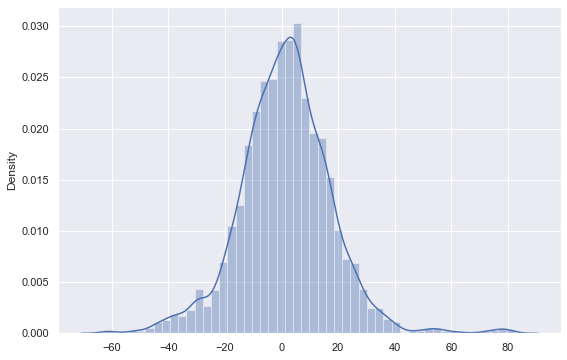

In [41]:
f, ax = plt.subplots(figsize=(9, 6))
ax = sns.distplot(y_test-y_pred)
plt.show

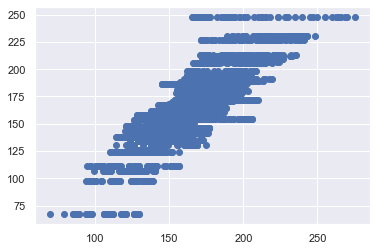

In [42]:
plt.scatter(y_pred, y_test)

In [43]:
# Creating a pickle file for the classifier
filename = 'first-innings-score-ridge-model.pkl'
pickle.dump(ridge_randomcv, open(filename, 'wb'))

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
# parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
# lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

# lasso_regressor.fit(X_train,y_train)
# print(lasso_regressor.best_params_)
# print(lasso_regressor.best_score_)

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV


alpha = [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,15,20,25,30,35,40,45]
max_iter = [int(x) for x in np.linspace(10, 1000,10)]
tol=[0.001,0.001,0.0001,0.00001]
selection = ['cyclic', 'random']

# Create the random grid
random_grid = {'alpha': alpha,
               'max_iter': max_iter,
               'tol': tol,
               'selection': selection
              }
print(random_grid)

In [ ]:
lasso_randomcv=RandomizedSearchCV(estimator=lasso,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100)
# fit the randomized model
lasso_randomcv.fit(X_train,y_train)

In [ ]:
lasso_randomcv.best_params_

In [ ]:
best_random_grid=lasso_randomcv.best_estimator_

In [ ]:
y_pred=best_random_grid.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(r2_score(y_test,y_pred))

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
ax = sns.distplot(y_test-y_pred)
plt.show

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf_randomcv.fit(X_train,y_train)

In [ ]:
rf_randomcv.best_params_

In [ ]:
rf_randomcv

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
y_pred=best_random_grid.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# X_train, y_train = make_regression(n_features=4, n_informative=2,
#                        random_state=0, shuffle=False)
regr = RandomForestRegressor(n_estimators=50,criterion='mse',max_depth=2,min_samples_split=2,random_state=0,max_samples=10)
regr.fit(X_train, y_train)

In [ ]:
pred=regr.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print(r2_score(y_test,pred))

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
ax = sns.distplot(y_test-pred)
plt.show

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
# X_train, y_train = load_diabetes(return_X_y=True)
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X_train, y_train, cv=10)

In [ ]:
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
ax = sns.distplot(y_test-y_pred)
plt.show

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(r2_score(y_test,y_pred))